# Exploratory Data Analysis
This dataset was scraped from Airbnb using Octoparse through a 2-step method, treated, merged and processed. You can check this all in the `preprocessing.ipynb` notebook in the repository. 

Our objective is to use it to analyse and understand the Airbnb market in Campos do Jordão, a touristic town in the state of São Paulo, Brazil.

In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [34]:
# Loading the dataset
df = pd.read_csv('datasets/final_dataset.csv')
df.rename(columns={'hostType': 'qualityBadge'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   roomType                           643 non-null    object 
 1   roomPrice                          643 non-null    float64
 2   roomURL                            643 non-null    object 
 3   qualityBadge                       643 non-null    object 
 4   rating                             643 non-null    float64
 5   countReviews                       643 non-null    float64
 6   Air Conditioning                   643 non-null    int64  
 7   TV                                 643 non-null    int64  
 8   Dryer                              643 non-null    int64  
 9   Bathroom                           643 non-null    int64  
 10  Ethernet connection                643 non-null    int64  
 11  Kitchen                            643 non-null    int64  

## Descriptive Analysis

In [35]:
## Descriptive Analysis
num_df = df[['roomPrice', 'rating', 'countReviews']]
cat_df = df[['roomType', 'qualityBadge', 'is_new']].astype('category')

In [36]:
# Numerical columns Analysis
num_descriptive = num_df.describe()

num_descriptive

,roomPrice,rating,countReviews
count,643.000000,643.000000,643.000000
mean,397.142686,4.656252,78.353033
std,215.939917,1.073395,82.308353
min,83.000000,0.000000,0.000000
25%,236.500000,4.830000,17.000000
50%,360.000000,4.940000,43.000000
75%,511.000000,4.990000,117.000000
max,993.000000,5.000000,507.000000


### Price

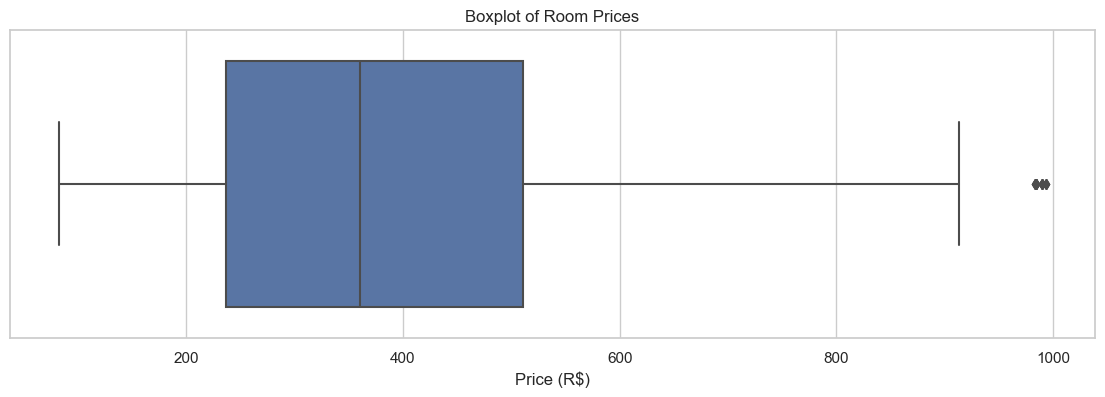

In [37]:
# Price columns Boxplots
sns.set_theme(context= 'notebook', style="whitegrid")

plt.figure(figsize=(14, 4))
sns.boxplot(x=df['roomPrice'])

plt.title('Boxplot of Room Prices')
plt.xlabel('Price (R$)')
plt.grid(True, axis='x')

plt.show()

c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


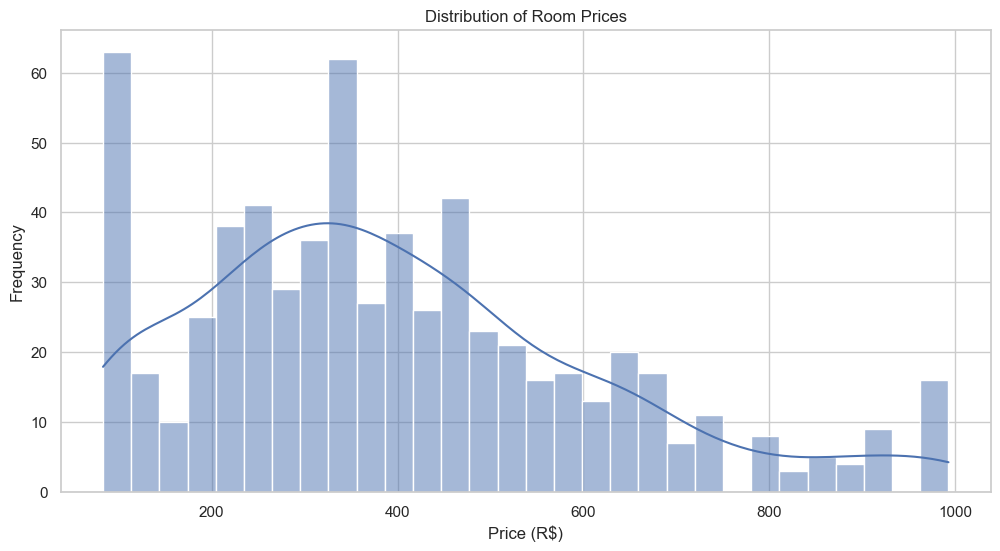

In [38]:
# Price histogram
sns.set_theme(context= 'notebook', style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(df['roomPrice'], bins=30, kde=True)

plt.title('Distribution of Room Prices')
plt.xlabel('Price (R$)')
plt.ylabel('Frequency')
plt.grid(True, axis='y')

plt.show()

In [39]:
# Creating 3 price groups
price_p25 = num_descriptive['roomPrice'].loc['25%']
price_p75 = num_descriptive['roomPrice'].loc['75%']

def categorize_price(price):
    if price <= price_p25:
        return 'Low price group'
    elif price <= price_p75:
        return 'Medium price group'
    else:
        return 'High price group'

df['priceCategory'] = df['roomPrice'].apply(categorize_price)

price_category_counts = df['priceCategory'].value_counts()
print(price_category_counts)

priceCategory
Medium price group    321
Low price group       161
High price group      161
Name: count, dtype: int64


In [40]:
grouped_description = df.groupby('priceCategory')[['roomPrice', 'rating', 'countReviews']].describe()

for group in grouped_description.index.get_level_values(0).unique():
    print(f"Descrição para {group}:")
    print(grouped_description.loc[group])
    print("\n" + "="*80 + "\n")

Descrição para High price group:
roomPrice     count    161.000000
              mean     696.409938
              std      145.903242
              min      514.000000
              25%      581.000000
              50%      649.000000
              75%      782.000000
              max      993.000000
rating        count    161.000000
              mean       4.826522
              std        0.774966
              min        0.000000
              25%        4.920000
              50%        4.970000
              75%        5.000000
              max        5.000000
countReviews  count    161.000000
              mean      71.801242
              std       80.373567
              min        0.000000
              25%       16.000000
              50%       36.000000
              75%      105.000000
              max      401.000000
Name: High price group, dtype: float64


Descrição para Low price group:
roomPrice     count    161.000000
              mean     154.316770
          

In [41]:
# Calculate the average rating for each price group
average_rating_per_price_group = df.groupby('priceCategory')['rating'].mean().rename('averageRating').reset_index()

average_rating_per_price_group

,priceCategory,averageRating
0,High price group,4.826522
1,Low price group,4.636149
2,Medium price group,4.580935


In [42]:
# Is the difference between average ratings statiscally significant?
# Perform the ANOVA test
anova_result = stats.f_oneway(
    df[df['priceCategory'] == 'Low price group']['rating'],
    df[df['priceCategory'] == 'Medium price group']['rating'],
    df[df['priceCategory'] == 'High price group']['rating']
)

# Print the results of the ANOVA test
print('ANOVA test result:', anova_result)

# If the p-value is less than 0.05, the differences are statistically significant.
# If the p-value is greater than 0.05, the differences are not statistically significant.

ANOVA test result: F_onewayResult(statistic=2.8605275268886468, pvalue=0.05797068235613843)


### Room types

In [43]:
# Room types
room_types = df['roomType'].value_counts(normalize=True)
room_types

roomType
Casa           0.177294
Apartamento    0.158631
Quarto         0.138414
Cabana         0.130638
Chalé          0.129082
Loft           0.069984
Microcasa      0.065319
Hotel          0.032659
Pousada        0.027994
Contêiner      0.018663
Suíte          0.017107
Lugar          0.015552
Condomínio     0.015552
Trailer        0.003110
Name: proportion, dtype: float64

In [44]:
# Calculate the average price for each room type within each price group
average_prices = df.groupby(['priceCategory', 'roomType'])['roomPrice'].mean().rename('averagePrice').reset_index()

# Merge the average prices with the top 3 room types by price group
top_3_with_avg_price = pd.merge(top_3_room_types_by_price_group, average_prices, on=['priceCategory', 'roomType'])

top_3_with_avg_price


,priceCategory,roomType,percentage,averagePrice
0,High price group,Cabana,0.372671,709.100000
1,High price group,Chalé,0.242236,786.256410
2,High price group,Apartamento,0.130435,660.238095
3,Low price group,Quarto,0.347826,147.696429
4,Low price group,Casa,0.267081,149.604651
5,Low price group,Microcasa,0.099379,215.625000
6,Medium price group,Apartamento,0.214953,406.695652
7,Medium price group,Casa,0.183801,399.843170
8,Medium price group,Chalé,0.130841,345.309524
